In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
results_path = '/uufs/chpc.utah.edu/common/home/lin-group9/agm/EM27/ha/results/daily'
ak_dates = ['20220616','20220910','20221122','20230131','20230428','20230710','20231006']
specs = {'ch4':[5938,6002,6076],'co2':[6220,6339],'co':[4233,4290,6339,6220]}

all_dfs = {}
for ak_date in ak_dates:
    all_dfs[ak_date] = {}
    day_path = os.path.join(results_path,ak_date)
    akall_files = [file for file in os.listdir(day_path) if (file.endswith('akall'))&(file.split('_')[0] in specs)]
    for spec in specs.keys():
        files = [file for file in akall_files if file.startswith(spec)]
        spec_df = pd.DataFrame()
        for file in files:
            window = file.split('_')[1].split('.')[0]
            df = pd.read_csv(os.path.join(day_path,file),header=1,sep='\s+')
            first_df = df.groupby('ispec').first()[['sza','ak','p']]
            for col in first_df.columns:
                first_df = first_df.rename(columns={col:f'{col}_{window}'})
            spec_df = pd.concat([spec_df,first_df],axis = 1)
        avg_cols = []
        for col in spec_df.columns:
            if 'ak' in col:
                avg_cols.append(col)
        spec_df['avg_ak'] = spec_df.apply(lambda row:row[avg_cols].mean(),axis = 1)
        all_dfs[ak_date][spec] = spec_df    


In [15]:
bin_dfs = {}
for spec in specs.keys():
    spec_df = pd.DataFrame()
    for date in all_dfs.keys():
        window = specs[spec][0]
        df = all_dfs[date][spec]
        df.index = round(df[f'sza_{window}']*2)/2
        df_binned = df.groupby(df.index).mean()[['avg_ak']]
        df_binned = df_binned.rename(columns = {'avg_ak':f'avg_ak_{date}'})
        spec_df = pd.concat([spec_df,df_binned],axis = 1)
    bin_dfs[spec] = spec_df.mean(axis = 1)

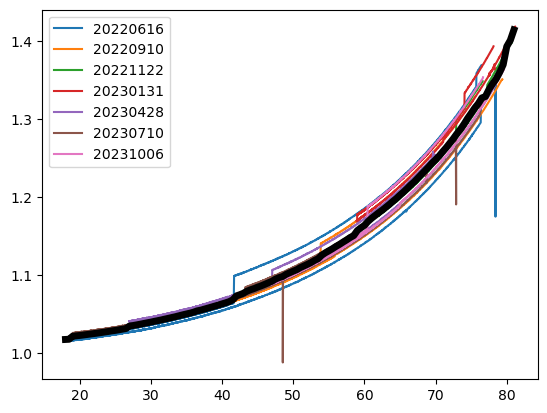

In [14]:
spec = 'co2'
date = list(all_dfs.keys())[0]
for date in all_dfs.keys():
    df = all_dfs[date][spec]
    window = specs[spec][0]
    # for window in windows:
    #     plt.plot(df[f'sza_{window}'],df[f'ak_{window}'],label = date)

    plt.plot(df[f'sza_{window}'],df['avg_ak'],label=date)

plt.plot(bin_dfs[spec],color = 'k',linewidth = 5)

plt.legend()


In [17]:
# # SAVING --careful not to overwrite
import pickle
pickle_path = f'/uufs/chpc.utah.edu/common/home/u0890904/LAIR_1/Data/Pickled_files/averaging_kernel'

fname = 'mean_sza0.5.pkl'
with open(os.path.join(pickle_path,fname), 'wb') as handle:
    pickle.dump(bin_dfs, handle, protocol=pickle.HIGHEST_PROTOCOL)

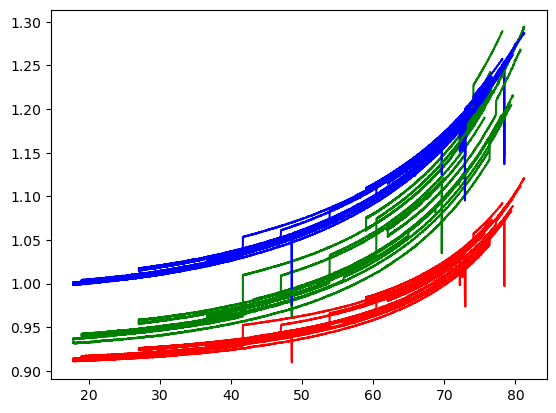

In [47]:
for date,df in all_ch4_dfs.items():
    plt.plot(df['sza_5938'],df['ak_5938'],color ='red',label = date)
    plt.plot(df['sza_6002'],df['ak_6002'],color ='green',label = date)
    plt.plot(df['sza_6076'],df['ak_6076'],color ='blue',label = date)

#plt.legend()

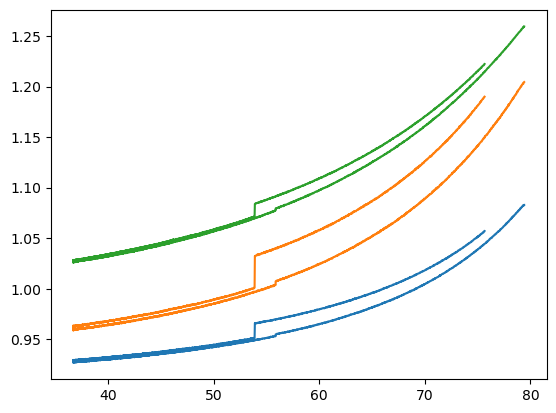

In [42]:
plt.plot(all_ch4_df['sza_5938'],all_ch4_df['ak_5938'])
plt.plot(all_ch4_df['sza_6002'],all_ch4_df['ak_6002'])
plt.plot(all_ch4_df['sza_6076'],all_ch4_df['ak_6076'])

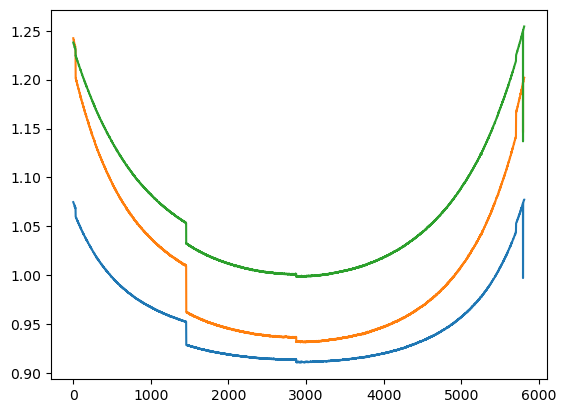

In [34]:
plt.plot(all_ch4_df['ak_5938'])
plt.plot(all_ch4_df['ak_6002'])
plt.plot(all_ch4_df['ak_6076'])